**Preprocessing(Cropping + Gamma Correction)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv

In [ ]:
%cd /content/drive/My Drive/School/'Fall 2020'/284A/'Diabetic Retinopathy Detection'

/content/drive/My Drive/School/Fall 2020/284A/Diabetic Retinopathy Detection


In [ ]:
data_dir = 'aptos2019_data/'
train_file = os.path.join(data_dir + 'train.csv')
train_dir = os.path.join(data_dir + 'train_images')
test_file = os.path.join(data_dir + 'test.csv')
test_dir = os.path.join(data_dir + 'test_images')

In [ ]:
train_info = pd.read_csv(train_file)
test_info = pd.read_csv(test_file)

**Original Images**

In [ ]:
np.random.seed(100)
ids = train_info['id_code'].values.flatten()
rand_ids = ids[np.random.choice(len(ids),6)]

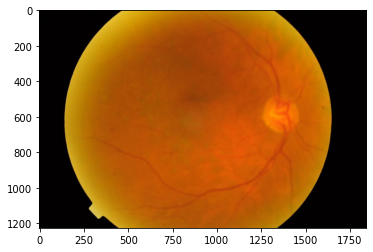

In [ ]:
I = cv.imread(os.path.join(train_dir, '0c2e2369dfff.png'))
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
plt.imshow(I);

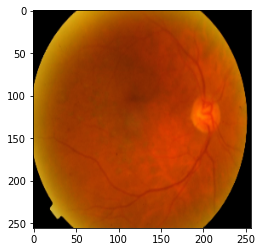

In [ ]:
I = cv.imread(os.path.join(train_dir, '0c2e2369dfff.png'))
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
I = I.astype('float32')
I = cropEye(I, 128)
gamma = 0.75
I = (I/255)**(1/gamma) 
plt.imshow(I);

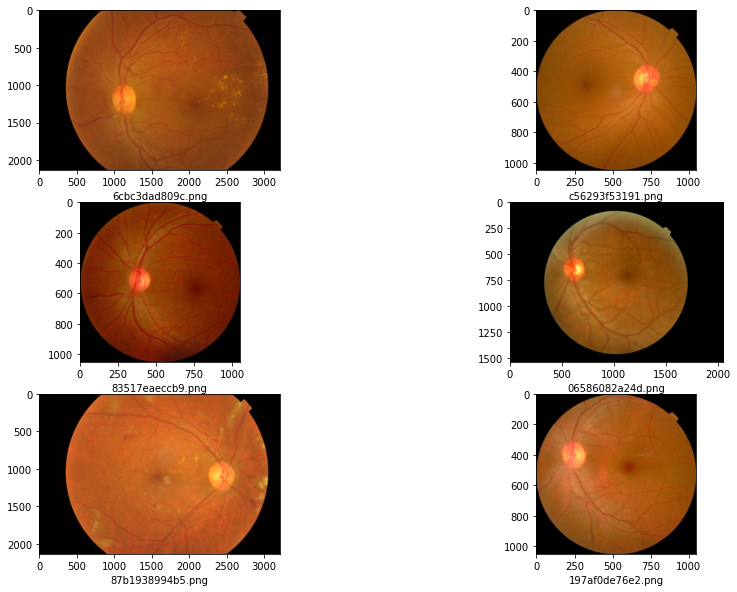

In [ ]:
fig = plt.figure(figsize=(15, 10))
n = len(rand_ids)
for i in range(n):
  I = cv.imread(os.path.join(train_dir, rand_ids[i]+".png"))
  I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
  fig.add_subplot(n/2,2,i+1)
  plt.imshow(I)
  plt.xlabel(rand_ids[i] + ".png")

In [ ]:
# img_avgs = []
# for f in os.listdir(train_dir):
#   I = cv.imread(os.path.join(train_dir, f))
#   I = I.astype('float32')
#   I = cropEye(I, 128)
#   img_avgs.append(np.mean(I))

In [ ]:
img_avgs = np.load('img_avgs.npy')

In [ ]:
print('image variance of unprocessed images:')
print(np.var(img_avgs))

image variance of unprocessed images:
216.61852


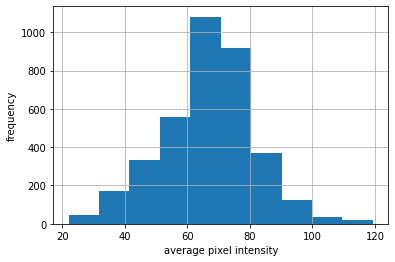

In [ ]:
pd.Series(img_avgs).hist()
plt.xlabel('average pixel intensity');
plt.ylabel('frequency');

In [ ]:
np.median(img_avgs)

67.78129

In [ ]:
np.mean(img_avgs)

66.78422

In [ ]:
img_avgs_p = []
for f in os.listdir(train_dir):
  I = cv.imread(os.path.join(train_dir, f))
  I = I.astype('float32')
  I = cropEye(I, 128)
  avg = np.mean(I)
  if avg <= 70:
    gamma = 1.45
  elif avg > 70 and avg <= 100:
    gamma = 1.1
  else:
    gamma = 0.6
  I = 255*(I/255)**(1/gamma) 
  img_avgs_p.append(np.mean(I))
print('image variance of processed images:')
print(np.var(img_avgs_p))

image variance of processed images:
92.06781


**Cropping**

In [ ]:
# RGB Cropping
def cropEye(img, radius):
  mid_row = img[int(img.shape[0]/2),:,:].sum(1)
  r = (mid_row > mid_row.mean()/10).sum()/2
  s = radius*(1/r)
  I_r = cv.resize(img,(0,0),fx=s,fy=s)
  center_row = int(I_r.shape[0]/2)
  center_col = int(I_r.shape[1]/2)
  start_x = max(center_row - radius, 0)
  end_x = center_row + radius
  start_y = max(center_col - radius, 0)
  end_y = center_col + radius
  I_cropped = I_r[start_x:end_x, start_y:end_y, :]
  if I_cropped.shape[0] != radius*2 or I_cropped.shape[1] != radius*2:
    I_cropped = cv.resize(I_cropped, (radius*2,radius*2))
  return I_cropped

#Grayscale cropping
def cropEyeGray(img, radius):
  mid_row = img[int(img.shape[0]/2),:]
  r = (mid_row > mid_row.mean()/10).sum()/2
  s = radius*(1/r)
  I_r = cv.resize(img,(0,0),fx=s,fy=s)
  center_row = int(I_r.shape[0]/2)
  center_col = int(I_r.shape[1]/2)
  start_x = max(center_row - radius, 0)
  end_x = center_row + radius
  start_y = max(center_col - radius, 0)
  end_y = center_col + radius
  I_cropped = I_r[start_x:end_x, start_y:end_y]
  if I_cropped.shape[0] != radius*2 or I_cropped.shape[1] != radius*2:
    I_cropped = cv.resize(I_cropped, (radius*2,radius*2))
  return I_cropped

\begin{equation*}
I_{out}   = 255*(\frac{I_{in}}{255})^\frac{1}{\gamma}
\end{equation*}

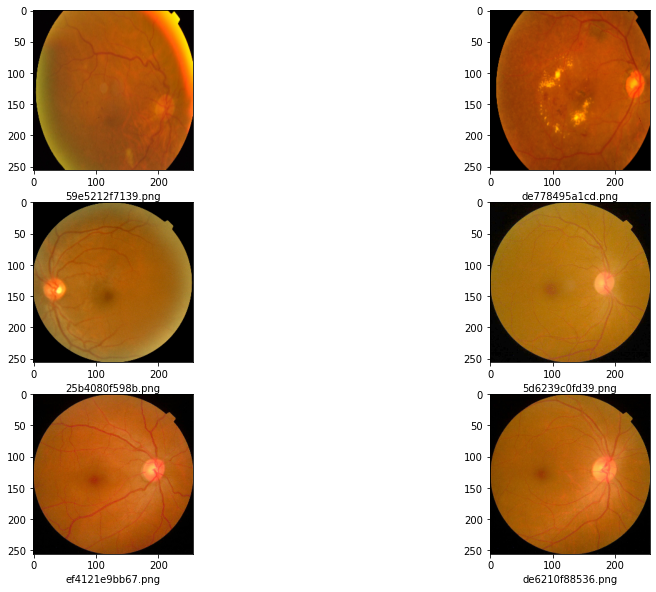

In [ ]:
fig = plt.figure(figsize=(15, 10))
n = len(rand_ids)
for i in range(n):
  I = cv.imread(os.path.join(train_dir, rand_ids[i]+".png"))
  I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
  I = I.astype('float32')
  I = cropEye(I, 128)
  avg = np.mean(I)
  if avg <= 70:
    gamma = 1.45
  elif avg > 70 and avg <= 100:
    gamma = 1.1
  else:
    gamma = 0.6
  I = (I/255)**(1/gamma)

  fig.add_subplot(n/2,2,i+1)
  plt.imshow(I)
  plt.xlabel(rand_ids[i] + ".png");

**Preprocess and Split Training Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_id = train_info['id_code'].values
y = train_info['diagnosis'].values
X_train_id, X_val_id, y_train, y_val = train_test_split(X_id,y,test_size=0.25,random_state=0,stratify=y)

In [ ]:
print('Number of training samples:', len(X_train_id))
print('Number of validation samples:', len(X_val_id))

Number of training samples: 2746
Number of validation samples: 916


In [ ]:
_, counts_train = np.unique(y_train, return_counts=True)
print('Training data distribution')
for i in range(5):
  print("{}: {:.3f}".format(i, counts_train[i]/len(y_train)))

Training data distribution
0: 0.493
1: 0.101
2: 0.273
3: 0.053
4: 0.080


In [ ]:
_, counts_val = np.unique(y_val, return_counts=True)
print('Validation data distribution')
for i in range(5):
  print("{}: {:.3f}".format(i, counts_val[i]/len(y_val)))

Validation data distribution
0: 0.492
1: 0.102
2: 0.273
3: 0.052
4: 0.081


In [ ]:
X_train = []
for id in X_train_id:
  I = cv.imread(os.path.join(train_dir, id+'.png'))
  I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
  I = I.astype('float32')
  I = cropEye(I, 128)
  avg = np.mean(I)
  if avg <= 70:
    gamma = 1.45
  elif avg > 70 and avg <= 100:
    gamma = 1.1
  else:
    gamma = 0.6
  I = (I/255)**(1/gamma)
  X_train.append(I)
X_train = np.array(X_train)
np.save('aptos2019_data/exp1/X_train.npy', X_train)

X_val = []
for id in X_val_id:
  I = cv.imread(os.path.join(train_dir, id+'.png'))
  I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
  I = I.astype('float32')
  I = cropEye(I, 128)
  avg = np.mean(I)
  if avg <= 70:
    gamma = 1.45
  elif avg > 70 and avg <= 100:
    gamma = 1.1
  else:
    gamma = 0.6
  I = (I/255)**(1/gamma)
  X_val.append(I)
X_val = np.array(X_val)
np.save('aptos2019_data/exp1/X_val.npy', X_val)

np.save('aptos2019_data/exp1/y_train.npy', y_train)
np.save('aptos2019_data/exp1/y_val.npy', y_val)

**Preprocess Test Data**

In [ ]:
X_test_id = test_info['id_code'].values

In [ ]:
X_test = []
for id in X_test_id:
  I = cv.imread(os.path.join(test_dir, id+'.png'))
  I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
  I = I.astype('float32')
  I = cropEye(I, 128)
  avg = np.mean(I)
  if avg <= 70:
    gamma = 1.45
  elif avg > 70 and avg <= 100:
    gamma = 1.1
  else:
    gamma = 0.6
  I = (I/255)**(1/gamma)
  X_test.append(I)
X_test = np.array(X_test)
np.save('aptos2019_data/exp1/X_test.npy', X_test)

In [ ]:
print(X_test.shape)
print(len(X_test))
y_test = np.zeros(len(X_test))

(1928, 256, 256, 3)
1928


In [ ]:
y_test.shape

(1928,)